In [ ]:
import pandas as pd
pd.set_option('display.max_columns',100)
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

# File system manangement
import os

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')

In [ ]:
!git clone https://github.com/taoo0316/YSC4224.git

fatal: destination path 'YSC4224' already exists and is not an empty directory.


In [ ]:
data = pd.read_csv('/content/YSC4224/telco_customer_churn.csv')
data

,customer_ID,gender,senior_citizen,partner,dependents,tenure,phone_Service,multiple_lines,internet,security_online,backup_online,device_protection,tech_support,streaming_tv,streaming_movies,contract_type,paperless_billing,payment_mode,charges_per_month,charges_total,churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


Model 1: Logistic Regression

First, we do one-hot encoding on the categorical variables to faciliate our modelling process.

In [ ]:
encoded_data = pd.get_dummies(data.drop(["customer_ID","charges_total"],axis=1))
encoded_data

,senior_citizen,tenure,charges_per_month,gender_Female,gender_Male,gender_Prefer not to say,partner_No,partner_Yes,dependents_No,dependents_Yes,phone_Service_No,phone_Service_Yes,multiple_lines_No,multiple_lines_No phone service,multiple_lines_Yes,internet_DSL,internet_Fiber optic,internet_No,security_online_No,security_online_No internet service,security_online_Yes,backup_online_No,backup_online_No internet service,backup_online_Yes,device_protection_No,device_protection_No internet service,device_protection_Yes,tech_support_No,tech_support_No internet service,tech_support_Yes,streaming_tv_No,streaming_tv_No internet service,streaming_tv_Yes,streaming_movies_No,streaming_movies_No internet service,streaming_movies_Yes,contract_type_Month-to-month,contract_type_One year,contract_type_Two year,paperless_billing_No,paperless_billing_Yes,payment_mode_Bank transfer (automatic),payment_mode_Credit card (automatic),payment_mode_Electronic check,payment_mode_Mailed check,churn_No,churn_Yes
0,0,1,29.85,1,0,0,0,1,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0
1,0,34,56.95,0,1,0,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,1,0
2,0,2,53.85,0,1,0,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1
3,0,45,42.30,0,1,0,1,0,1,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0,1,0
4,0,2,70.70,1,0,0,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,0,1,0,0,1,0,1,0,1,0,0,1,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,1,0
7039,0,72,103.20,1,0,0,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,1,0,0,1,0
7040,0,11,29.60,1,0,0,0,1,0,1,1,0,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0
7041,1,4,74.40,0,1,0,0,1,1,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1


In [ ]:
independent_encoded_data=encoded_data.drop(["churn_No","churn_Yes"],axis=1)
independent_encoded_data

,senior_citizen,tenure,charges_per_month,gender_Female,gender_Male,gender_Prefer not to say,partner_No,partner_Yes,dependents_No,dependents_Yes,phone_Service_No,phone_Service_Yes,multiple_lines_No,multiple_lines_No phone service,multiple_lines_Yes,internet_DSL,internet_Fiber optic,internet_No,security_online_No,security_online_No internet service,security_online_Yes,backup_online_No,backup_online_No internet service,backup_online_Yes,device_protection_No,device_protection_No internet service,device_protection_Yes,tech_support_No,tech_support_No internet service,tech_support_Yes,streaming_tv_No,streaming_tv_No internet service,streaming_tv_Yes,streaming_movies_No,streaming_movies_No internet service,streaming_movies_Yes,contract_type_Month-to-month,contract_type_One year,contract_type_Two year,paperless_billing_No,paperless_billing_Yes,payment_mode_Bank transfer (automatic),payment_mode_Credit card (automatic),payment_mode_Electronic check,payment_mode_Mailed check
0,0,1,29.85,1,0,0,0,1,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,0,1,0,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,0,1,0,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,0,1,0,1,0,1,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,1,0,0,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,0,1,0,0,1,0,1,0,1,0,0,1,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1
7039,0,72,103.20,1,0,0,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,1,0,0
7040,0,11,29.60,1,0,0,0,1,0,1,1,0,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0
7041,1,4,74.40,0,1,0,0,1,1,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1


In [83]:
cor = encoded_data.corr()
cor_target = abs(cor["churn_Yes"])
# Correlation between Features and Target
cor_features = cor_target
cor_features.sort_values(ascending=False)

churn_No                                  1.000000
churn_Yes                                 1.000000
contract_type_Month-to-month              0.405103
tenure                                    0.352229
security_online_No                        0.342637
tech_support_No                           0.337281
internet_Fiber optic                      0.308020
contract_type_Two year                    0.302253
payment_mode_Electronic check             0.301919
backup_online_No                          0.268005
device_protection_No                      0.252481
tech_support_No internet service          0.227890
backup_online_No internet service         0.227890
security_online_No internet service       0.227890
internet_No                               0.227890
streaming_tv_No internet service          0.227890
streaming_movies_No internet service      0.227890
device_protection_No internet service     0.227890
charges_per_month                         0.193356
paperless_billing_No           

In [84]:
X = independent_encoded_data
y = encoded_data["churn_Yes"]

# Test Train Split

train_X, val_X, train_y, val_y = train_test_split(
    X, y, test_size=0.20,random_state=0)

In [85]:
from sklearn.feature_selection import SelectKBest, chi2

# running K Best Feature Selection, using a Chi-Squared scoring function

fs = SelectKBest(score_func=chi2)

fs.fit(train_X, train_y)

SelectKBest(score_func=<function chi2 at 0x7f888554ee60>)

In [86]:
feature_names = list(independent_encoded_data.columns.values)
k_best_scores = pd.DataFrame({'Feature Name': feature_names, 'Importance Score': list(fs.scores_)})
k_best_scores.sort_values(by=['Importance Score'], ascending = False)

,Feature Name,Importance Score
1,tenure,13790.950564
2,charges_per_month,2846.021278
36,contract_type_Month-to-month,430.266785
38,contract_type_Two year,387.130102
43,payment_mode_Electronic check,363.225518
18,security_online_No,324.535490
27,tech_support_No,322.881943
16,internet_Fiber optic,299.843970
21,backup_online_No,256.651147
19,security_online_No internet service,220.658268


Logistic Regression

In [87]:
lr = LogisticRegression()
lr.fit(train_X, train_y)
predictions = lr.predict(val_X)
accuracy = accuracy_score(val_y, predictions)
print(accuracy)
from sklearn.metrics import classification_report
print(classification_report(val_y,predictions))

0.7963094393186657
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1041
           1       0.64      0.51      0.57       368

    accuracy                           0.80      1409
   macro avg       0.74      0.70      0.72      1409
weighted avg       0.79      0.80      0.79      1409



In [88]:
lr = LogisticRegression()
scores = cross_val_score(lr, X, y, cv=10)
scores.sort()
accuracy = scores.mean()

print(scores)
print(accuracy)

[0.77698864 0.79261364 0.7929078  0.796875   0.79971591 0.80141844
 0.80539773 0.81107955 0.81134752 0.81960227]
0.8007946486137975


In [89]:
lr = LogisticRegression()

lr.fit(independent_encoded_data, encoded_data["churn_Yes"])


def rmse(actual_y, predicted_y):
    """
    Args:
        predicted_y: an array of the prediction from the model
        actual_y: an array of the groudtruth label
        
    Returns:
        The root mean square error between the prediction and the groundtruth
    """

    return np.sqrt(np.mean((actual_y - predicted_y)**2))

train_error = rmse(train_y,lr.predict(train_X))
test_error = rmse(val_y,lr.predict(val_X))

print("Training RMSE:", train_error)
print("Test RMSE:", test_error)

Training RMSE: 0.4424654199508987
Test RMSE: 0.4465783485947801


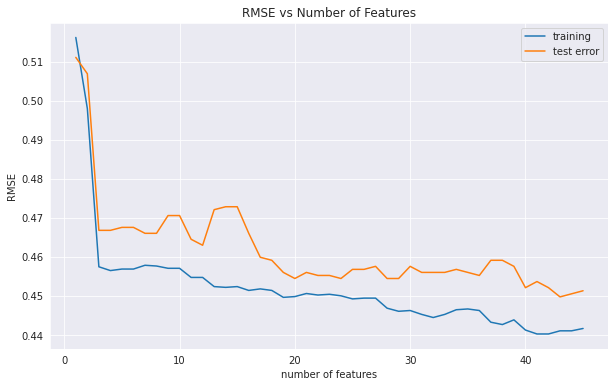

In [90]:
# Plotting RMSE against Number Features

train_error_vs_N = []
test_error_vs_N = []

range_of_num_features = range(1, train_X.shape[1] + 1)

for N in range_of_num_features:
    X_train_first_N_features = train_X.iloc[:, :N]    
    
    lr.fit(X_train_first_N_features, train_y)
    train_error_overfit = rmse(train_y, lr.predict(X_train_first_N_features))
    train_error_vs_N.append(train_error_overfit)
    
    X_test_first_N_features = val_X.iloc[:, :N]
    test_error_overfit = rmse(val_y, lr.predict(X_test_first_N_features))    
    test_error_vs_N.append(test_error_overfit)
    
plt.figure(figsize=(10, 6))
plt.plot(range_of_num_features, train_error_vs_N)
plt.plot(range_of_num_features, test_error_vs_N)
plt.legend(["training", "test error"])
plt.title('RMSE vs Number of Features')
plt.xlabel("number of features")
plt.ylabel("RMSE");

Linear Regression

In [91]:
ln = LinearRegression()

ln.fit(independent_encoded_data, encoded_data["churn_Yes"])

LinearRegression()

In [92]:
# counting number of >1 and <0 results

ln_res = ln.predict(independent_encoded_data)
count = 0
for i in range(len(list(ln_res))):
  if ln_res[i]>1 or ln_res[i]<0:
    count = count + 1
count

1094

In [93]:
ln_pred = ln.predict(val_X)

# 0.5 as the classification standard

ln_pred[ln_pred < 0.5] = 0
ln_pred[ln_pred >= 0.5] = 1
ln_accuracy = accuracy_score(val_y, ln_pred)
print(classification_report(val_y,ln_pred))
print(accuracy)
print(ln_accuracy)

              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1041
           1       0.65      0.47      0.55       368

    accuracy                           0.80      1409
   macro avg       0.74      0.69      0.71      1409
weighted avg       0.78      0.80      0.78      1409

0.8007946486137975
0.7963094393186657


LightGBM

In [94]:
import lightgbm as lgb

In [95]:
lgbmodel = lgb.LGBMClassifier(learning_rate=0.09,max_depth=-5,random_state=42)
lgbmodel.fit(train_X,train_y,eval_set=[(val_X,val_y),(train_X,train_y)],
          verbose=20,eval_metric='logloss')

[20]	training's binary_logloss: 0.385318	training's binary_logloss: 0.385318	valid_0's binary_logloss: 0.435819	valid_0's binary_logloss: 0.435819
[40]	training's binary_logloss: 0.347919	training's binary_logloss: 0.347919	valid_0's binary_logloss: 0.435941	valid_0's binary_logloss: 0.435941
[60]	training's binary_logloss: 0.323532	training's binary_logloss: 0.323532	valid_0's binary_logloss: 0.441028	valid_0's binary_logloss: 0.441028
[80]	training's binary_logloss: 0.304787	training's binary_logloss: 0.304787	valid_0's binary_logloss: 0.444759	valid_0's binary_logloss: 0.444759
[100]	training's binary_logloss: 0.290315	training's binary_logloss: 0.290315	valid_0's binary_logloss: 0.451474	valid_0's binary_logloss: 0.451474


LGBMClassifier(learning_rate=0.09, max_depth=-5, random_state=42)

In [96]:
print('Training accuracy {:.4f}'.format(lgbmodel.score(train_X,train_y)))
print('Testing accuracy {:.4f}'.format(lgbmodel.score(val_X,val_y)))

Training accuracy 0.8706
Testing accuracy 0.7857


In [97]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(lgbmodel, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

Accuracy: 0.798 (0.010)


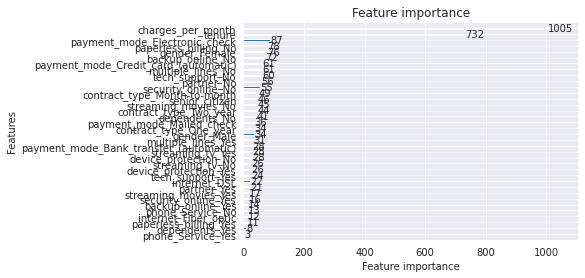

In [98]:
# plot of Feature Importance for LGBM model

lgb.plot_importance(lgbmodel)

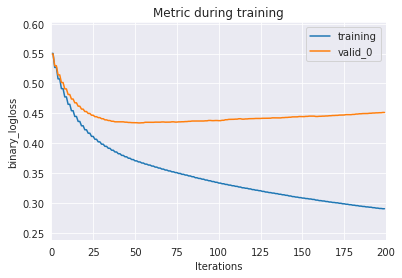

In [99]:
lgb.plot_metric(lgbmodel)

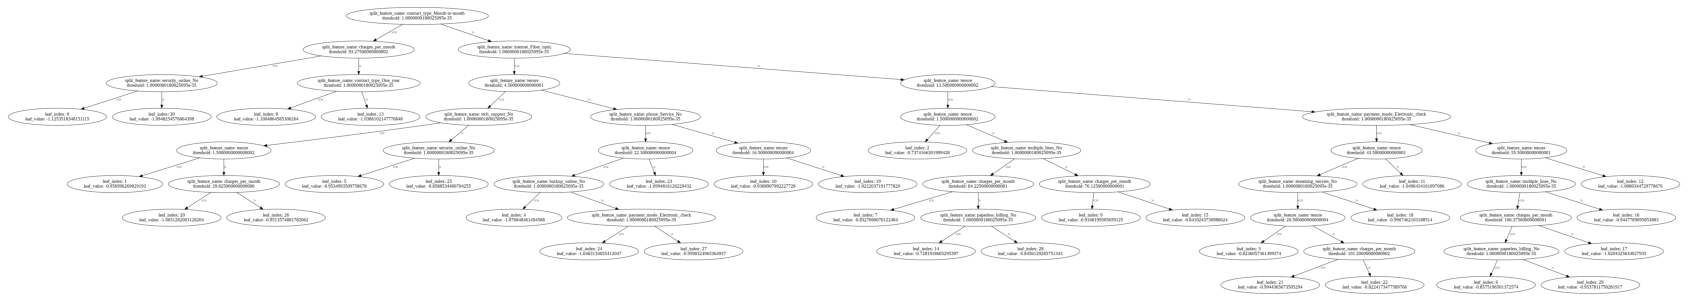

In [100]:
lgb.plot_tree(lgbmodel,figsize=(30,40))

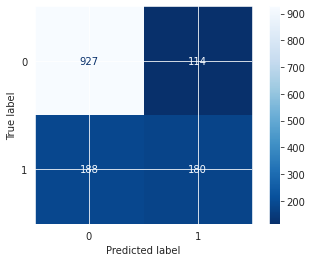

In [101]:
from sklearn import metrics
metrics.plot_confusion_matrix(lgbmodel,val_X,val_y,cmap='Blues_r')

AdaBoost

In [102]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import RepeatedStratifiedKFold

In [103]:
# define the model
adamodel = AdaBoostClassifier()
adamodel.fit(train_X,train_y)
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(adamodel, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

Accuracy: 0.802 (0.011)


Random Forest

In [104]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

clf.fit(train_X,train_y)

y_pred=clf.predict(val_X)

In [105]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(val_y, y_pred))

Accuracy: 0.7735982966643009


In [106]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(clf, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

Accuracy: 0.785 (0.013)


Feature Importance

In [107]:
feature_imp = pd.DataFrame({'Value':lgbmodel.feature_importances_,'Feature':X.columns})

In [108]:
print(feature_imp.sort_values(by=["Value"],ascending=False))

    Value                                 Feature
2    1005                       charges_per_month
1     732                                  tenure
43     87           payment_mode_Electronic check
39     78                    paperless_billing_No
3      76                           gender_Female
21     72                        backup_online_No
42     61    payment_mode_Credit card (automatic)
12     61                       multiple_lines_No
27     60                         tech_support_No
6      56                              partner_No
18     55                      security_online_No
36     49            contract_type_Month-to-month
0      46                          senior_citizen
33     45                     streaming_movies_No
38     44                  contract_type_Two year
8      41                           dependents_No
44     36               payment_mode_Mailed check
37     34                  contract_type_One year
4      34                             gender_Male


Setting a threshold of 50, the most important features are security_online_No, partner_No,tech_support_No,multiple_lines_No,payment_mode_Credit card (automatic),backup_online_No,gender_Female,paperless_billing_No,payment_mode_Electronic check,tenure and charges_per_month.

Ensemble learning

In [109]:
from sklearn import model_selection
from sklearn.ensemble import VotingClassifier
# create the sub models
estimators = []
estimators.append(('logistic', lr))
estimators.append(('lgbm', lgbmodel))
estimators.append(('adaboost', adamodel))
estimators.append(('randomforest', clf))
# create the ensemble model
ensemble = VotingClassifier(estimators)
ensemble.fit(train_X,train_y)
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(ensemble, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

Accuracy: 0.802 (0.011)


It can be seen that the ensemble model has the best accuracy (cross-fold) out of all models

Logistic: ROC AUC=0.824
LGB: ROC AUC=0.819
ADA: ROC AUC=0.831
RF: ROC AUC=0.798


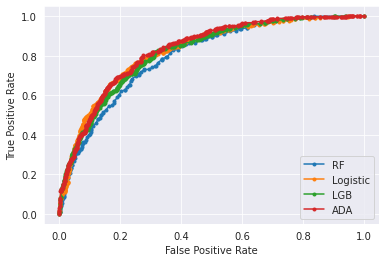

In [110]:
# ROC curves for all models in the ensemble model

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

lr_probs = lr.predict_proba(val_X)
lr_probs = lr_probs[:, 1]
lgb_probs = lgbmodel.predict_proba(val_X)
lgb_probs = lgb_probs[:, 1]
ada_probs = adamodel.predict_proba(val_X)
ada_probs = ada_probs[:, 1]
clf_probs = clf.predict_proba(val_X)
clf_probs = clf_probs[:,1]
lr_auc = roc_auc_score(val_y, lr_probs)
lgb_auc = roc_auc_score(val_y, lgb_probs)
ada_auc = roc_auc_score(val_y, ada_probs)
clf_auc = roc_auc_score(val_y, clf_probs)
print('Logistic: ROC AUC=%.3f' % (lr_auc))
print('LGB: ROC AUC=%.3f' % (lgb_auc))
print('ADA: ROC AUC=%.3f' % (ada_auc))
print('RF: ROC AUC=%.3f' % (clf_auc))
clf_fpr, clf_tpr, _ = roc_curve(val_y, clf_probs)
lr_fpr, lr_tpr, _ = roc_curve(val_y, lr_probs)
lgb_fpr, lgb_tpr, _ = roc_curve(val_y, lgb_probs)
ada_fpr, ada_tpr, _ = roc_curve(val_y, ada_probs)
pyplot.plot(clf_fpr, clf_tpr, marker='.', label='RF')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
pyplot.plot(lgb_fpr, lgb_tpr, marker='.', label='LGB')
pyplot.plot(ada_fpr, ada_tpr, marker='.', label='ADA')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
pyplot.show()